In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('https://raw.githubusercontent.com/shivang98/Social-Network-ads-Boost/master/Social_Network_Ads.csv')


In [3]:
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

print(X[:3, :])
print('-'*15)
print(y[:3])

[[   19 19000]
 [   35 20000]
 [   26 43000]]
---------------
[0 0 0]


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

print(X_train[:3])
print('-'*15)
print(y_train[:3])
print('-'*15)
print(X_test[:3])
print('-'*15)
print(y_test[:3])

[[    44  39000]
 [    32 120000]
 [    38  50000]]
---------------
[0 1 0]
---------------
[[   30 87000]
 [   38 50000]
 [   35 75000]]
---------------
[0 0 0]


In [8]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [9]:
print(X_train[:3])
print('-'*15)
print(X_test[:3])

[[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]]
---------------
[[-0.80480212  0.50496393]
 [-0.01254409 -0.5677824 ]
 [-0.30964085  0.1570462 ]]


In [10]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, solver='lbfgs' )
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print(X_test[:10])
print('-'*15)
print(y_pred[:10])

[[-0.80480212  0.50496393]
 [-0.01254409 -0.5677824 ]
 [-0.30964085  0.1570462 ]
 [-0.80480212  0.27301877]
 [-0.30964085 -0.5677824 ]
 [-1.10189888 -1.43757673]
 [-0.70576986 -1.58254245]
 [-0.21060859  2.15757314]
 [-1.99318916 -0.04590581]
 [ 0.8787462  -0.77073441]]
---------------
[0 0 0 0 0 0 0 1 0 1]


In [11]:
print(y_pred[:20])
print(y_test[:20])

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0]


In [12]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[65  3]
 [ 8 24]]


C:\Users\Vivobook Pro\AppData\Local\Temp\ipykernel_6216\3094738786.py:31: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_train_scaled[y_train == j, 0], X_train_scaled[y_train == j, 1],


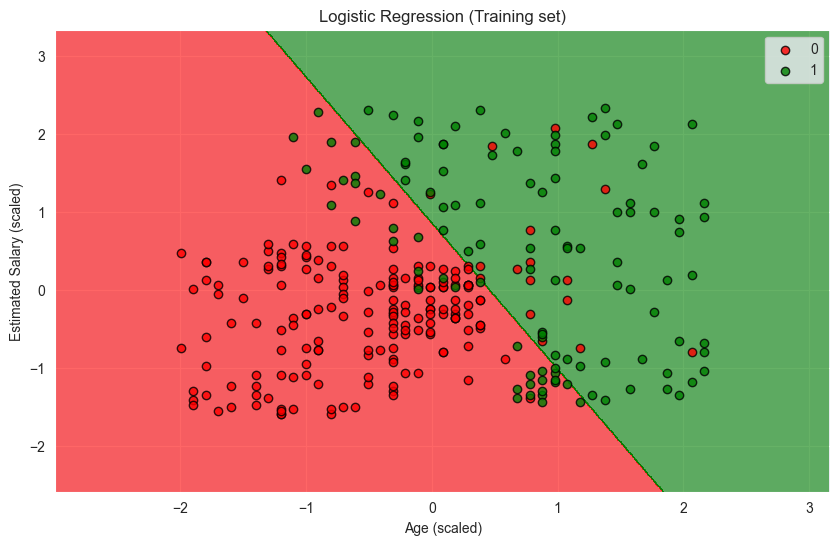

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Fit the logistic regression model
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
model = LogisticRegression(random_state=0)
model.fit(X_train_scaled, y_train)

# Define the range for the plot
X1_min, X1_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
X2_min, X2_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
X1_range = np.arange(X1_min, X1_max, 0.01)
X2_range = np.arange(X2_min, X2_max, 0.01)
X1_mesh, X2_mesh = np.meshgrid(X1_range, X2_range)
X_mesh = np.array([X1_mesh.ravel(), X2_mesh.ravel()]).T

# Predict the classes for each point in the mesh
y_mesh = model.predict(X_mesh)
y_mesh = y_mesh.reshape(X1_mesh.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(X1_mesh, X2_mesh, y_mesh, alpha=0.6, cmap=ListedColormap(('red', 'green')))

# Plot the training points
for i, j in enumerate(np.unique(y_train)):
    plt.scatter(X_train_scaled[y_train == j, 0], X_train_scaled[y_train == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j, edgecolors='black', alpha=0.8)

plt.xlim(X1_min, X1_max)
plt.ylim(X2_min, X2_max)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age (scaled)')
plt.ylabel('Estimated Salary (scaled)')
plt.legend()
plt.show()



C:\Users\Vivobook Pro\AppData\Local\Temp\ipykernel_6216\4032483917.py:23: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_test[y_test == j, 0], X_test[y_test == j, 1],


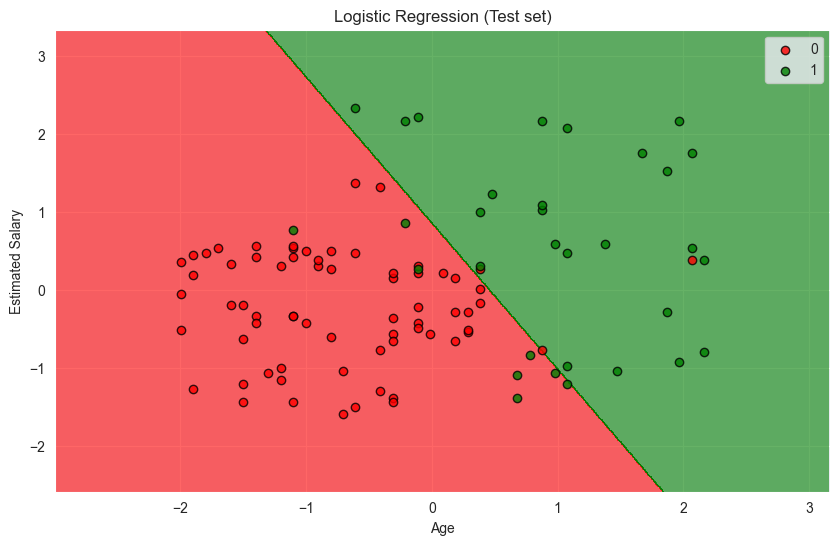

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

# Define the range for the plot
X1_min, X1_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
X2_min, X2_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
X1_range = np.arange(X1_min, X1_max, 0.01)
X2_range = np.arange(X2_min, X2_max, 0.01)
X1_mesh, X2_mesh = np.meshgrid(X1_range, X2_range)
X_mesh = np.array([X1_mesh.ravel(), X2_mesh.ravel()]).T

# Predict the classes for each point in the mesh
y_mesh = model.predict(sc.transform(X_mesh))
y_mesh = y_mesh.reshape(X1_mesh.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(X1_mesh, X2_mesh, y_mesh, alpha=0.6, cmap=ListedColormap(('red', 'green')))

# Plot the test points
for i, j in enumerate(np.unique(y_test)):
    plt.scatter(X_test[y_test == j, 0], X_test[y_test == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j, edgecolors='black', alpha=0.8)

plt.xlim(X1_min, X1_max)
plt.ylim(X2_min, X2_max)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()
